# Is there a link between certain Covid-19 vaccines and 2023 excess all-cause mortality in the EU?





In [1]:
#Importing necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as sps
import statsmodels.api as sm

# Safe setting for Pandas.  Needs Pandas version >= 1.5.
pd.set_option('mode.copy_on_write', True)

Running the following line of code will fetch the vaccination data we will use in our project. Due to an issue of single-use download links for the excess mortality data, please refer to the README.md file for further instructions before proceeding with the rest of this notebook.

In [2]:
#Importing our fetch data file 
import fetch_data

Fetch and validation passed


## Introduction 

There is ongoing debate in public health discourse about the relationship between COVID-19 vaccinations and excess mortality in the post-pandemic era. This discussion has gained traction in light of various countries reporting unexpected excess mortality rates following widespread vaccine rollout. Contrasting interpretations of data by health authorities, researchers, and policymakers, leads to a complex mix of perspectives on the factors influencing recent trends of excess mortality. This controversy underscores the need for transparent analysis into whether COVID-19 vaccination campaigns have influenced population health outcomes.

This project seeks to explore whether there is an association between excess all-cause mortality seen across European Union (EU) countries post-Covid 19 pandemic and Covid-19 vaccination. Our investigation spans 30 countries, encompassing the 27 EU member states, along with Norway, Iceland, and Liechtenstein.

Excess all-cause mortality, which measures the percentage deviation between observed and expected deaths from any cause in a given period, provides a  lens through which we can assess the macro level impacts of the pandemic and vaccination efforts. To explore the relationship between Covid-19 vaccination and excess all-cause mortality, we utilise linear regression as our primary analytical approach.

The inclusion of 30 European countries in our study provides a rich dataset that enables us to investigate potential links between different vaccination types and variations in excess all-cause mortality. This research seeks to uncover insights into the factors influencing post-pandemic mortality patterns.

## Literature review

Excess mortality following the COVID-19 pandemic has raised concerns globally. Various countries have reported significant deviations from expected mortality rates. Notably, the United States witnessed a substantial 5-12% weekly increase in all-cause excess mortality during the latter half of 2022 (CDC, 2023). Similarly, the United Kingdom experienced six consecutive quarters of excess mortality as of September 2023 (O'Dowd, 2023), and Australia recorded a 7% excess mortality in the first five months of 2023, although they attributed half of these deaths to COVID-19 (Adair, 2023). 

The underlying causes of post-pandemic excess mortality remain a subject of debate and investigation. In a UK parliamentary debate on October 20, 2023, former Tory MP Andrew Bridgen stated that COVID-19 vaccines were rushed through trials and therefore might be contributing to the observed increase in excess mortality. Bridgen criticised the Office for National Statistics (ONS) and the Medicine and Healthcare Products Regulatory Agency (MHRA) for mishandling data to promote a pro-vaccine agenda.

The UK Department for Health and Social Care asserted that there was no evidence linking excess mortality to COVID-19 vaccines. The published report has since been removed from the government website, but can still be accessed [here](https://dailysceptic.org/wp-content/uploads/2023/11/Final-Briefing-on-Excess-Deaths-24-October-2023.pdf). The report has many shortcomings. It considered all vaccine types homogenously and there were inconsistencies in reported data related on the number of unvaccinated individuals, monthly death figures, and age-standardized mortality rate calculations (Jefferson and Heneghan, 2023). 

Vaccine safety concerns were initiated during the Covid-19 pandemic with the suspension of AstraZeneca's COVID-19 vaccine in several European countries due to concerns over rare blood clots (McGrail, 2021). The debate over vaccine safety has been further fueled by reports of side effects, such as elevated risks of myocarditis and pericarditis associated with mRNA vaccines, though the causal links remain unclear (Alami et al., 2023). A study by Aarstad and Kvitastein (2023) found a correlation between 2021 general vaccination uptake in Europe and increased 2022 all-cause mortality, they conclude that one percentage point increase in 2021 general vaccination uptake was associated with a 2022 monthly mortality increase of 0.105 percent. 


Contrarily, other factors have been suggested as contributors to the recent spike in excess deaths. These include increased incidences of flu, an aging European population, the lasting effects of Covid-19 (long Covid), and strained healthcare services leading to delayed treatments and diagnoses (McDonald, 2022).

To develop the discourse on this debate it is necessary to explore an association between the uptake of individual vaccines and excess mortality. Given the varied excess mortality across Europe and the utilisation of different vaccine types, the European Union offers a rich dataset for exploring potential links between different COVID-19 vaccines and mortality rates. 


## Excess mortality data 

Eurostat's excess mortality indicator is part of the European Statistical Recovery Dashboard and takes the number of people who died from any cause in a given period and compares it with a historical baseline from previous years. In the case of the dataset we will be using, this baseline consists of the average number of deaths that occurred each month during the period 2016-2019.  

The term excess death refers to the absolute difference between the number of observed and expected deaths in a given period (CITE). To better enable comparisons across countries with large differences in population, this project investigates excess *mortality*, which refers to the percentage difference between the observed and expected number of deaths.

In particular, we will be looking at *all-cause* excess mortality, which refers to the percentage difference in the number of observed deaths from any cause in a given period, compared to the expected number of deaths from any cause in that given period.


Therefore, when referring to excess mortality throughout this project, we will be referring to the percentage difference in additional deaths from any cause in comparison to the average monthly deaths in 2016-2019. The higher the value, the higher the number of additional deaths, with negative numbers indicating fewer deaths compared to the baseline period.

This excess mortality indicator is based on a data collection in which National Statistical Institutes from the European Union (EU) and the European Free Trade Association (EFTA) have transmitted weekly deaths data to Eurostat on a voluntary basis since April 2020. This weekly deaths dataset is then used to compute the monthly excess mortality indicator by mapping the deaths of each week to a full month. 

The data covered in this analysis include all deaths that have occurred since January 2020 and up until September 2023. It is important to note that excess mortality has not been previously been recorded at the same scale as that during, and since, the Covid-19 pandemic. As a result, we were unable to find data with which to compare the recent (post-Covid-19) variance in excess mortality, and we acknowledge our inability to determine how unusual this variance is as one limitation of this project.

#### Cleaning excess mortality data
The data downloads and reads in an awkward format. The country column is labelled as 'TIME'. Each month excess mortality data point also comes with an adjacent column labelling whether it is confirmed data, provisional data or estimated data. Countries are also labelled with their full names. In order to work with the data, we had to complete some provisional cleaning which is detailed below.

In [3]:
#Reading in initial excess mortality data
dirty_mortality = pd.read_excel('data/excess_mortality.xlsx', sheet_name = 'Sheet 1', skiprows=7, skipfooter=6)
dirty_mortality.head()

,TIME,2020-01,Unnamed: 2,2020-02,Unnamed: 4,2020-03,Unnamed: 6,2020-04,Unnamed: 8,2020-05,...,2023-05,Unnamed: 82,2023-06,Unnamed: 84,2023-07,Unnamed: 86,2023-08,Unnamed: 88,2023-09,Unnamed: 90
0,GEO (Labels),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,European Union - 27 countries (from 2020),-5.7,p,-2.5,p,13.6,p,25.2,p,3.1,...,3.5,p,2.9,p,2.3,p,3.7,p,3.2,ep
2,Belgium,-4.1,NaN,-4.9,NaN,11.8,NaN,73.1,NaN,8.1,...,0.0,p,6.9,p,-3.7,p,-0.2,p,4.1,p
3,Bulgaria,-11.8,NaN,-0.2,NaN,-7.0,NaN,-4.2,NaN,-3.0,...,-6.0,p,-8.1,p,-2.6,p,-5.0,p,-6.3,p
4,Czechia,-2.0,NaN,0.0,NaN,-0.9,NaN,2.9,NaN,-1.3,...,-0.9,p,-0.6,p,-3.3,p,0.5,p,-4.3,ep


In [4]:
drop_labels = dirty_mortality.drop(index= 0)

We need to remove any non-numerical data. This meant we had to first remove the columns which labelled the corresponding data point with NaN, p or ep (confirmed, provisional or estimated provisional). Examining the data you can see that most of the data in 2021 is confirmed with a few countries remaining provisional. Data for 2022 becomes majority provisional and data for 2023 is almost all provisional. There are only 4 estimated data points in the dataset and they are all for the latest recorded month of data - September 2023. 

"Provisional data" implies a level of uncertainty or preliminary status, and it is used when reporting information that is subject to further verification or may undergo changes as more accurate and complete information becomes available.
We acknowledge this as a potential limitation, that most of the 2023 data can be changed at the behest of the European Union. But we can at the very least be confident that these are in the majority of cases not estimates.

In [5]:
# Remove columns labelling rates that are estimated or provisional data 
only_numbers = drop_labels.loc[:, ~drop_labels.columns.str.startswith('Unnamed')]

We then had to set the index as the country names, and relabelled the index 'Country'.

In [6]:
# Set index as country names and change index title
excess_mortality = only_numbers.set_index('TIME').rename_axis('Country')

The vaccine data (yet to be read in) refers to EU countries by country code, as oppose to country name as in this dataset. In order to merge the data later on in the project, we needed a common label for each country so that the relevant mortality data matches up to the relevant vaccination data. We chose to use country codes as they are shorter and therefore marginally easier to code with in data analysis.  

In [7]:
# Creating dictionary to convert countries to corresponding country code
country_code_dict = {
    'Belgium': 'BE', 
    'Bulgaria': 'BG', 
    'Czechia': 'CZ', 
    'Denmark': 'DK', 
    'Germany': 'DE', 
    'Estonia': 'EE',
    'Ireland': 'IE', 
    'Greece': 'GR', 
    'Spain': 'ES', 
    'France': 'FR', 
    'Croatia': 'HR', 
    'Italy': 'IT',
    'Cyprus': 'CY', 
    'Latvia': 'LV', 
    'Lithuania': 'LT', 
    'Luxembourg': 'LU', 
    'Hungary': 'HU', 
    'Malta': 'MT',
    'Netherlands': 'NL', 
    'Austria': 'AT', 
    'Poland': 'PL', 
    'Portugal': 'PT', 
    'Romania': 'RO',
    'Slovenia': 'SI', 
    'Slovakia': 'SK', 
    'Finland': 'FI', 
    'Sweden': 'SE', 
    'Iceland': 'IS',
    'Liechtenstein': 'LI',
    'Norway': 'NO', 
    'Switzerland': 'CH', 
    }
#Adding a new column called 'ReportingCountry' with associated country codes
excess_mortality['ReportingCountry'] = excess_mortality.index.map(country_code_dict)
excess_mortality.head()


,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,...,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,ReportingCountry
Country,,,,,,,,,,,,,,,,,,,,,
European Union - 27 countries (from 2020),-5.7,-2.5,13.6,25.2,3.1,1.8,2.8,7.6,8.0,17.3,...,4.1,-1.1,1.3,4.2,3.5,2.9,2.3,3.7,3.2,NaN
Belgium,-4.1,-4.9,11.8,73.1,8.1,-1.1,-7.1,17.8,1.7,22.5,...,5.6,-4.7,-2.1,-0.1,0.0,6.9,-3.7,-0.2,4.1,BE
Bulgaria,-11.8,-0.2,-7.0,-4.2,-3.0,-0.4,5.5,5.9,4.9,12.6,...,-12.1,-8.0,-9.1,-7.3,-6.0,-8.1,-2.6,-5.0,-6.3,BG
Czechia,-2.0,0.0,-0.9,2.9,-1.3,3.9,4.1,6.9,11.4,52.8,...,9.2,-6.2,-3.6,1.0,-0.9,-0.6,-3.3,0.5,-4.3,CZ
Denmark,-2.1,-7.0,-3.9,6.4,-0.9,0.8,2.2,1.5,4.2,1.8,...,11.9,-1.8,0.9,9.4,6.7,5.2,7.9,4.4,7.6,DK


## Covid-19 Vaccination data

Our data on Covid-19 vaccination comes from the European Centre for Disease Prevention and Control's Vaccine Tracker, and covers EU and EEA (European Economic Area) countries.

The data is collected through The European Surveillance System (TESSy), and are submitted by European Union/European Economic Area countries to the ECDC once every four weeks. EU/EEA Member States report aggregated vaccination data by age and specific target groups, with doses reported by vaccine product.

#### Cleaning vaccination data

In [8]:
#Reading in initial vaccination data
dirty_vaccine_data = pd.read_excel('data/vaccine_types.xlsx')
dirty_vaccine_data.head()

,YearWeekISO,ReportingCountry,Denominator,NumberDosesReceived,NumberDosesExported,FirstDose,FirstDoseRefused,SecondDose,DoseAdditional1,DoseAdditional2,DoseAdditional3,DoseAdditional4,DoseAdditional5,UnknownDose,Region,TargetGroup,Vaccine,Population
0,2021-W01,AT,1392642.0,0.0,0.0,0,NaN,0,0,0,0,0,0,0,AT,Age50_59,MODBA.1,8932664
1,2022-W23,AT,676675.0,0.0,0.0,14,NaN,12,12,5,0,0,0,0,AT,Age18_24,NVXD,8978929
2,2021-W32,AT,424628.0,0.0,0.0,0,NaN,0,0,0,0,0,0,0,AT,Age10_14,MODBA.1,8932664
3,2021-W32,AT,260101.0,0.0,0.0,0,NaN,0,0,0,0,0,0,0,AT,Age15_17,MODBA.1,8932664
4,2021-W32,AT,676675.0,0.0,0.0,0,NaN,0,0,0,0,0,0,0,AT,Age18_24,MODBA.1,8932664


There were many columns not relevant to our investigation, therefore we removed them.

In [9]:
#Dropping unwanted columns
cut_down_dvd = dirty_vaccine_data.drop(['Denominator', 'NumberDosesReceived', 'NumberDosesExported', 'FirstDoseRefused', 'DoseAdditional1', 'DoseAdditional2', 'DoseAdditional3', 'DoseAdditional4', 'DoseAdditional5', 'UnknownDose'], axis = 1)

Some countries listed both a total count and a count by region. The majority of countries only included a total vaccine count so we removed any counts by region.

In [10]:
#Remove regions to only get full country
no_regions = cut_down_dvd[cut_down_dvd['ReportingCountry'] == cut_down_dvd['Region']]

The data for some countries, including Finland, had duplicated rows for some weeks. To resolve this we removed any duplicate rows where the 'YearWeekISO', 'ReportingCountry', and 'FirstDose' column were all identical.

In [11]:
#Drop duplicate rows
vaccine_data = no_regions.drop_duplicates(subset = ['YearWeekISO', 'ReportingCountry', 'FirstDose'])
vaccine_data

,YearWeekISO,ReportingCountry,FirstDose,SecondDose,Region,TargetGroup,Vaccine,Population
0,2021-W01,AT,0,0,AT,Age50_59,MODBA.1,8932664
1,2022-W23,AT,14,12,AT,Age18_24,NVXD,8978929
2,2021-W32,AT,0,0,AT,Age10_14,MODBA.1,8932664
5,2021-W06,AT,5,0,AT,Age15_17,AZ,8932664
6,2021-W06,AT,1976,1,AT,Age18_24,AZ,8932664
...,...,...,...,...,...,...,...,...
816546,2022-W37,SK,9,9,SK,Age18_24,COM,5434712
816547,2022-W37,SK,3,1,SK,Age15_17,COM,5434712
816549,2022-W37,SK,42,52,SK,ALL,COM,5434712
816550,2022-W36,SK,0,1,SK,Age60_69,NVXD,5434712


Given there were duplicate counts due to the 'Region' column and duplicated rows, we also decided to check that there is no duplication or multiple counts of the same vaccine in the 'Vaccine' column denominating vaccine type. The breakdown of vaccines for the data set (https://www.ecdc.europa.eu/sites/default/files/documents/Variable_Dictionary_VaccineTracker-5-april-2023.pdf) provides info on each of the vaccines administered. 

Some of the vaccines are adaptations of the general vaccine e.g. COM refers to the Pfizer BioNTech - Comirnaty whilst COMBA.4-5 refers to a variant of the COM vaccine targetting Original/Omicron BA.4/BA.5. Due to a large variety of countries in our dataset and each country having a varying approach to collecting data we end up with these sub-categories of vaccine variations such as COMBIV who's numbers are negligeable compared to the full Pfizer category "COM". We aknowledge this fact but we shall keep those subcategories in the vaccines list in case we find something unusual within the vaccine subcategories when regressed against excess mortality.

In [12]:
# Display total number of first doses administered for each vaccine type
vaccine_data.groupby('Vaccine')['FirstDose'].sum()

Vaccine
AZ            56952224
BECNBG         2268333
BHACOV              47
COM          359198521
COMBA.1           7890
COMBA.4-5        58272
COMBIV             263
COMXBB           20635
JANSS         32573823
MOD           53856205
MODBA.1           1996
MODBA.4-5          439
MODBIV               0
NVXD            217120
SGSK               290
SIN              10241
SPU            1866316
UNK          180064929
VLA                781
Name: FirstDose, dtype: int64

### Clean DataFrames

After cleaning our data, we have obtained the following dataframe for excess mortality:

In [13]:
excess_mortality.head()

,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,...,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,ReportingCountry
Country,,,,,,,,,,,,,,,,,,,,,
European Union - 27 countries (from 2020),-5.7,-2.5,13.6,25.2,3.1,1.8,2.8,7.6,8.0,17.3,...,4.1,-1.1,1.3,4.2,3.5,2.9,2.3,3.7,3.2,NaN
Belgium,-4.1,-4.9,11.8,73.1,8.1,-1.1,-7.1,17.8,1.7,22.5,...,5.6,-4.7,-2.1,-0.1,0.0,6.9,-3.7,-0.2,4.1,BE
Bulgaria,-11.8,-0.2,-7.0,-4.2,-3.0,-0.4,5.5,5.9,4.9,12.6,...,-12.1,-8.0,-9.1,-7.3,-6.0,-8.1,-2.6,-5.0,-6.3,BG
Czechia,-2.0,0.0,-0.9,2.9,-1.3,3.9,4.1,6.9,11.4,52.8,...,9.2,-6.2,-3.6,1.0,-0.9,-0.6,-3.3,0.5,-4.3,CZ
Denmark,-2.1,-7.0,-3.9,6.4,-0.9,0.8,2.2,1.5,4.2,1.8,...,11.9,-1.8,0.9,9.4,6.7,5.2,7.9,4.4,7.6,DK


Each row of the dataframe corresponds to a reporting country, and the values within each row correspond to that country's percentage difference in deaths from any cause in that month, in comparison to the average monthly deaths in 2016-2019.

The following dataframe summarise the excess mortality data:

And the following dataframe for Covid-19 vaccinations:

In [14]:
vaccine_data.head()

,YearWeekISO,ReportingCountry,FirstDose,SecondDose,Region,TargetGroup,Vaccine,Population
0,2021-W01,AT,0,0,AT,Age50_59,MODBA.1,8932664
1,2022-W23,AT,14,12,AT,Age18_24,NVXD,8978929
2,2021-W32,AT,0,0,AT,Age10_14,MODBA.1,8932664
5,2021-W06,AT,5,0,AT,Age15_17,AZ,8932664
6,2021-W06,AT,1976,1,AT,Age18_24,AZ,8932664


This dataframe gives you a matrix of age breakdown by dose by week per vaccine type by country. Thus, every week has multiple rows each corresponding to different age categories and the groups correspond to their vaccine type. 


### Preliminary Analysis

We will begin with a preliminary analysis for 2023 to see whether uptake of Covid-19 vaccines in general have a relationship with excess mortality across european countries. 

In order to get an idea of excess mortality across Europe we have calculated a mean excess mortality for the 9 recorded months of 2023 for all EU countries and the EU as a whole. We chose to focus on excess mortality from the beginning of 2023 because the majority of COVID-19 vaccines were administered in 2021 and 2022. 

Our initial regression mirrors the approach taken by Aarstad and Kvitastein (2023) in their recent paper which regressed all cause mortality in the first 9 months of 2022 on vaccination uptake (at the turn of 2022) but expands upon it with more first doses of vaccines having been administered in 2022 providing a larger set of data points.

This provides a cutoff point for a 'fair' investigation - vaccination counts are counted up until 2023 and excess mortality mean is calculated from the beggining of 2023.

In [15]:
#Adding a year column
vaccine_data['Year'] = vaccine_data['YearWeekISO'].str[:4].str.strip()
#Displaying counts of first vaccination dose by year
vaccine_data.groupby('Year')['FirstDose'].sum()

Year
2020      1783598
2021    665507880
2022     19427772
2023       379075
Name: FirstDose, dtype: int64

In [16]:
# Creating a dataframe to describe the data
excess_mortality.describe()

,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,...,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,...,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,-5.521875,-1.381250,5.771875,16.262500,3.865625,0.828125,2.662500,6.350000,7.803125,14.431250,...,16.909375,6.103125,-1.684375,0.806250,3.312500,3.921875,4.037500,3.053125,4.103125,3.496875
std,6.942191,9.414383,14.103540,21.940297,6.989236,6.290814,6.055003,5.903744,6.322897,11.958515,...,13.818906,8.609053,7.345181,6.542119,5.907772,5.851977,6.566717,14.599514,7.018385,7.962553
min,-24.500000,-11.200000,-12.600000,-4.200000,-6.100000,-19.900000,-7.100000,-6.300000,-1.900000,-3.300000,...,-38.000000,-12.100000,-22.800000,-13.900000,-7.700000,-6.000000,-10.200000,-46.000000,-10.700000,-13.700000
25%,-9.275000,-4.925000,-1.200000,2.550000,-0.925000,-0.575000,-0.700000,2.750000,4.800000,5.475000,...,11.075000,0.900000,-6.575000,-2.625000,-0.100000,-0.400000,-0.850000,-2.600000,-0.275000,-1.675000
50%,-5.400000,-2.050000,1.800000,5.950000,2.600000,1.300000,2.200000,5.500000,7.100000,13.650000,...,20.100000,6.650000,-2.050000,0.950000,2.750000,4.350000,4.150000,2.100000,4.300000,4.800000
75%,-3.625000,-0.550000,9.775000,25.800000,5.975000,3.825000,4.375000,7.850000,9.000000,18.975000,...,24.250000,10.700000,2.500000,5.525000,9.325000,8.025000,8.275000,7.600000,8.300000,9.100000
max,14.200000,46.000000,54.300000,80.800000,26.400000,10.700000,25.800000,24.400000,29.300000,52.800000,...,39.000000,29.500000,13.800000,12.600000,13.200000,17.500000,14.500000,54.000000,21.300000,16.500000


This description shows us that around the fiftieth percentile most countries have a positive excess mortality and most means are positive as well. This is a glimpse into the underlying problem.

<function matplotlib.pyplot.show(close=None, block=None)>

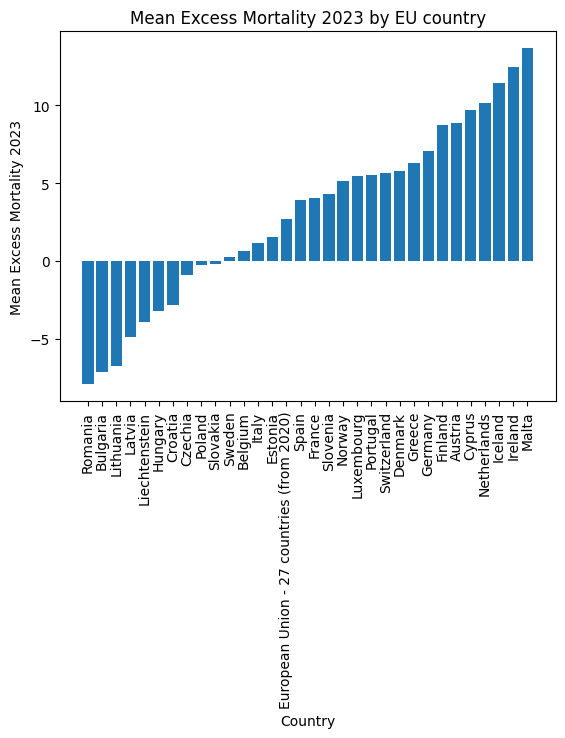

In [17]:
# Select only months for 2023
months_2023 = ['2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06', '2023-07', '2023-08', '2023-09']

# Add a mean excess all cause mortality by EU country for 2023 
excess_mortality['Mean 2023'] = excess_mortality[months_2023].apply(pd.to_numeric, errors='coerce').mean(axis = 1)

# Plot histogram of excess all cause mortality for 2023
plt.bar(x=excess_mortality.sort_values('Mean 2023').index, height=excess_mortality.sort_values('Mean 2023')['Mean 2023'])
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Mean Excess Mortality 2023')
plt.title('Mean Excess Mortality 2023 by EU country')
plt.show

##### Inital regression of mean excess mortality against vaccination percentage for EU countries

In order to account for varying population sizes, we used the percentage of vaccinated individuals in countries.

The first dose column contains the number of first dose vaccines administered to individuals during the reporting week. We summed all of these values up until 2023, to get a total number of people in each country who had received a first dose of any type of vaccine. By selecting first dose only, we made a binary categorisation: vaccinated or not.

In [18]:
# Get series with count for total first dose vaccinations for each country up to start of 2023
total_vaxed_up_to_23 = vaccine_data[vaccine_data['Year'] != '2023'][vaccine_data['TargetGroup'] == 'ALL'].groupby('ReportingCountry')['FirstDose'].sum()


C:\Users\charl\AppData\Local\Temp\ipykernel_23900\39011440.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  total_vaxed_up_to_23 = vaccine_data[vaccine_data['Year'] != '2023'][vaccine_data['TargetGroup'] == 'ALL'].groupby('ReportingCountry')['FirstDose'].sum()


We then needed to find the population of each country to convert this to a percentage. We took the population of each country to be the population as of week 1 in 2023. 

In [19]:
#Taking the population for each country in as of the first week of 2023
population_wk1_23 = vaccine_data[vaccine_data['YearWeekISO'] == '2023-W01'].groupby('ReportingCountry')['Population'].first()

#Converting the number of people vaccinated into a proportion of the population
percent_vaxed_wk1_23= total_vaxed_up_to_23/population_wk1_23 * 100

To run the regression we selected the mean 2023 and reporting country column from the excess mortality dataframe. We merged this with the 'percentage vaccinated' column to create a dataframe with the percentage vaccinated and the mean excess mortality in 2023 for each country. When doing this we were unable to preserve data for both the total EU and Switzerland as these were not available categories in the vaccine dataset. 

In [20]:
# New dataframe with only ReportingCountry and Mean 2023 from excess mortality 
country_and_mean = excess_mortality[['ReportingCountry', 'Mean 2023']]
# Merge percentaged vaccinated into new merged dataframe
merged = pd.merge(country_and_mean, pd.DataFrame(percent_vaxed_wk1_23), on = 'ReportingCountry').rename(columns ={0: '% Vaxed'})
merged.head()

,ReportingCountry,Mean 2023,% Vaxed
0,BE,0.644444,73.199853
1,BG,-7.166667,30.351588
2,CZ,-0.911111,62.274122
3,DK,5.800000,73.213511
4,DE,7.066667,72.436922


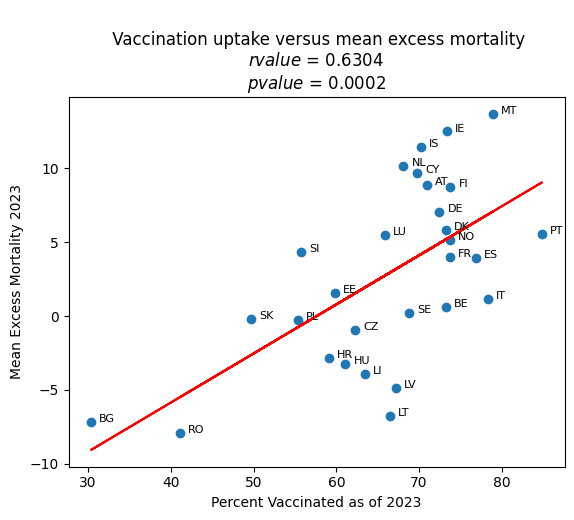

In [21]:
# Perform OLS regression
regression = sps.linregress(merged['% Vaxed'], merged['Mean 2023'])

# Create scatter plot
plt.scatter(merged['% Vaxed'],merged['Mean 2023'])

# Add country code data point labels
for i in range(len(merged)):
    plt.text(merged['% Vaxed'][i] + 1, merged['Mean 2023'][i], merged['ReportingCountry'][i], fontsize=8)

# Plot labels and title and add line of best fit
plt.xlabel('Percent Vaccinated as of 2023')
plt.ylabel('Mean Excess Mortality 2023')
plt.title(f"\n Vaccination uptake versus mean excess mortality\n$rvalue$ = {round(regression.rvalue,4)} \n$pvalue$ = {round(regression.pvalue,4)}")
plt.plot(percent_vaxed_wk1_23, regression[1] + regression[0]*percent_vaxed_wk1_23, 'r', label='fitted line')

plt.show()

This initial linear regression plot yielded a correlation coefficient of 0.63, indicating a moderate postitive correlation between mean 2023 excess all-cause mortality and the percentage of the population that was vaccinated at the end of 2022. The positive correlation suggests that the higher a country's proportion of vaccinated individuals, the higher their levels of excess all-cause mortality. The gradient of the best fit line suggests that for every 1% incresase in vaccination uptake a 0.344% increase in excess mortaility is to be expected. A very small p-value of 0.0003 enables us to have high confidence that the observed correlation did not arise from our null-model of no correlation.

We will now investigate whether linear regression is an appropriate technique to investigate the relationship between percentage vaccinated pre 2023 and mean excess mortality in 2023.

##### Residual error plot


In order to verify whether linear regression is an appropriate technique to investigate the relationship between a country's percentage of vaccinated individals and its excess mortality, we decided to explore the residual errors from the above linear regression.

The following plot demonstrates the residual error in terms of vertical distance between each data point and each fitted value.

Text(0.5, 1.0, 'Residual Error Plot')

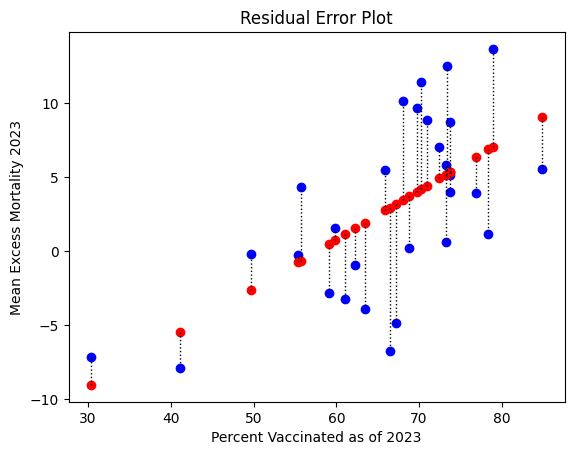

In [22]:
#A plot to demonstrate the actual values, predicted values and residual error
import residual_plot
residual_plot.plot_with_errors(merged['% Vaxed'], merged['Mean 2023'], regression.intercept, regression.slope)
plt.xlabel('Percent Vaccinated as of 2023')
plt.ylabel('Mean Excess Mortality 2023')
plt.title('Residual Error Plot')

We used a residual vs fitted value plot to check whether the relationship between a country' percentage of vaccinated individals and its excess mortality, is adequately captured by a linear model.

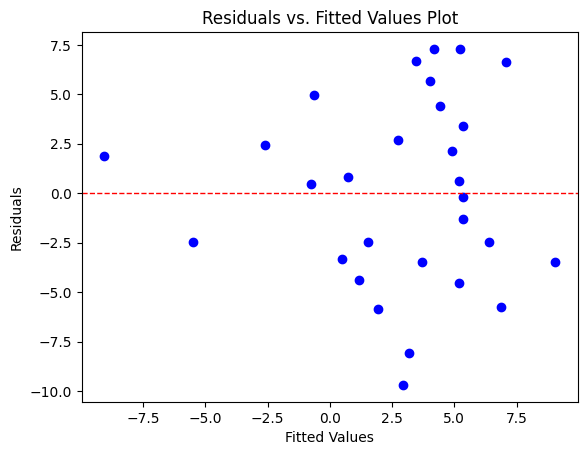

In [23]:
# Checking for linearity
predicted = regression.intercept + regression.slope * merged['% Vaxed']
residual = merged['Mean 2023'] - predicted
plt.scatter(x=predicted, y=residual, color='blue')
plt.title('Residuals vs. Fitted Values Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
# Add a horizontal line at y=0 for reference
plt.axhline(y=0, color='red', linestyle='--', linewidth=1) 
plt.show()

Ideally, the residuals should be scattered with no discernible pattern. As there doesn't appear to be an obvious pattern in how the residuals are distributed from left to right, we can be relatively confident of a linear relationship between the percentage of vaccinated individuals in a country and mean 2023 excess mortality.

We then checked whether the assumption made by linear regression that the residual errors follow a normal distribution was correct, using a histogram plot. 

Text(0.5, 1.0, 'Distribution of the residual errors')

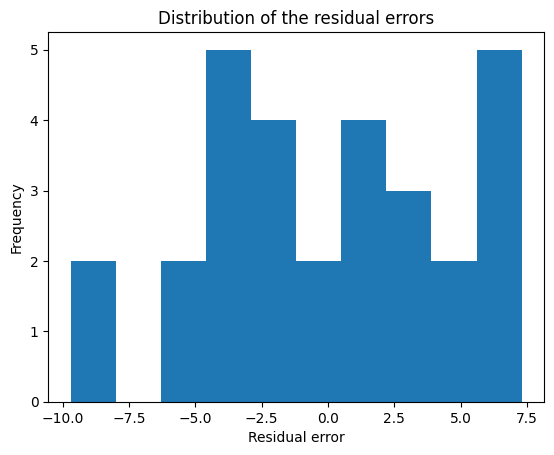

In [24]:
#Plotting a histogram of the residual errors
predicted = regression.intercept + regression.slope * merged['% Vaxed']
plt.hist(residual)
plt.xlabel('Residual error')
plt.ylabel('Frequency')
plt.title('Distribution of the residual errors')

This histogram doesn't help us very much, as it doesn't look very bell-shaped but also doesn't give us a very good idea of what the distribution is. To further investigate the normality of the residuals, we plotted a Q-Q plot of the residuals.

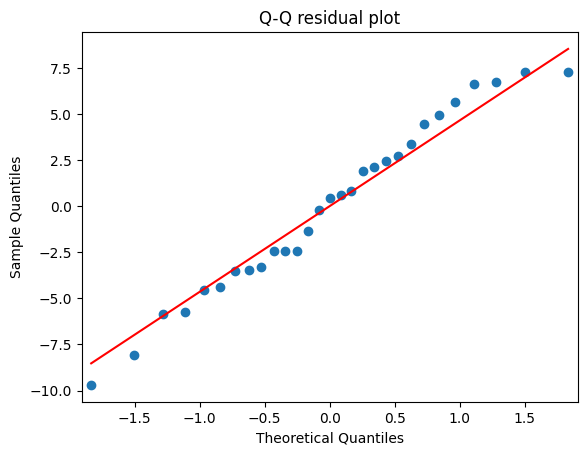

In [25]:
# Creating quartile-quartile plot
sm.qqplot(residual, line='s')
plt.title('Q-Q residual plot')
plt.show()

Since, the majority of the residuals seem to fall along the straight line, with no significant systemic deviation we can infer that the residuals are approximately normally distributed.

Finally, to check how the residuals vary with changes in the chosen regressor, we plotted a residual vs regressor plot for each regressor.

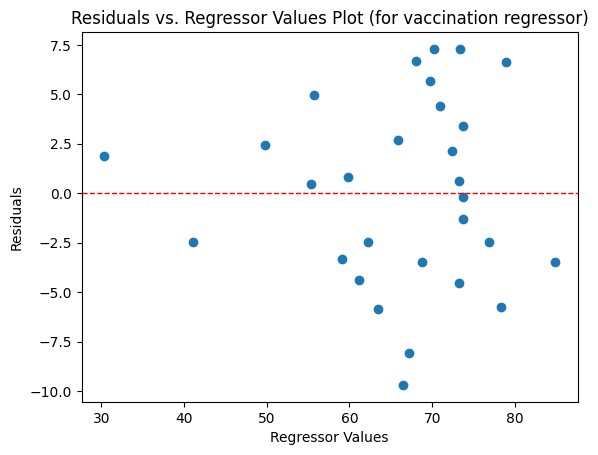

In [26]:
# Create Residuals vs Vaccination regressor values plot
plt.scatter(merged['% Vaxed'], residual)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)  # Reference line
plt.xlabel('Regressor Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Regressor Values Plot (for vaccination regressor)')
plt.show()

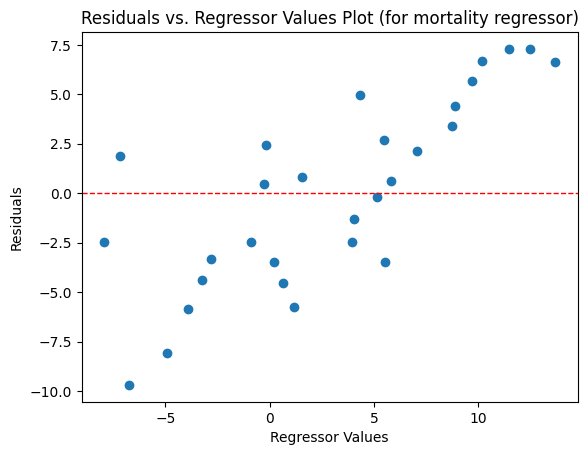

In [27]:
# Create Residuals vs Mortality regressor values plot
plt.scatter(merged['Mean 2023'] , residual)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)  # Reference line
plt.xlabel('Regressor Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Regressor Values Plot (for mortality regressor)')
plt.show()

The second of these regression plots looks slightly abnormal in that there seems to be a pattern in the distribution of the residuals. Due to time contraints, we will be sticking to linear regression however further research into whether non-linear models could be more appropriate to model the relationship is recommended.

##### Assumptions/limitations

- Using vaccination percentage up to 2023 then mean mortality since start of 2023
- Mean mortality across 2023 could flatten the seasonality of excess mortality?
- Just focusing on first doses
- We know it is correlated but the question is whether vaccination rate impacted excess mortality - look into confounding variables 

## Regression of mean excess mortality against vaccination percentage for EU countries by vaccination type

So far, we have only investigated whether there seems to be a relationship between the percentage of vaccinated individuals and 2023 excess mortality across EU countries. We have only explored this in terms of vaccination *by any* Covid-19 vaccine. 

Our vaccination data includes the weekly number of first doses by each vaccination type (for each country). Different vaccine manufacturers produce different kinds of vaccines. Pfizer-BioTech and Moderna are both mRNA vaccines, which are are supposedly linked to an increased number of cardiac incidents (Paknahad et.al, 2023). Both the Oxford Astrazeneca and Janssen (Johnson and Johnson) vaccines are viral vector vaccines. It is resonable to suggest that each vaccine type could have a different impact on the health of individuals, and therefore excess mortality.

We  investigated the relationship between excess mortality and vaccine by manufacturer. We used the same mean excess mortality figure from our first regresssion.

We first created a dataframe containing number of first doses administered up until 2023, grouped by both type and country simaltaneously. 

In [28]:
# First doses administered count by vaccine type and country
by_type_and_country = vaccine_data[(vaccine_data['Year'] != '2023') & (vaccine_data['TargetGroup'] == 'ALL')].groupby(['ReportingCountry','Vaccine'])['FirstDose'].sum()
by_type_and_country = by_type_and_country.reset_index()
by_type_and_country.head()

,ReportingCountry,Vaccine,FirstDose
0,AT,AZ,817520
1,AT,COM,4629737
2,AT,COMBA.1,527
3,AT,COMBA.4-5,3188
4,AT,JANSS,352626


In [29]:
# Add country population column
by_type_and_country = pd.merge(by_type_and_country, population_wk1_23, on = 'ReportingCountry')

In [30]:
# Add columnn denoting percentage of population vaccinated by specific vaccination types 
by_type_and_country['% vaxed'] = by_type_and_country['FirstDose'] / by_type_and_country['Population']

In [31]:
# Dictionary to rename vaccines with their full names
vaccine_rename = {
    'AZ' : 'Astrazeneca',
    'COM' : 'Pfizer',
    'COMBA.1' : 'PfizerBA1',
    'COMBA.4-5' : 'PfizerBA4_5',
    'JANSS' : 'Janssen',
    'MOD' : 'Moderna',
    'MODBA.1' : 'ModernaBA1',
    'MODBBA.4-5' : 'ModernaBA4_5',
    'NVXD' : 'Novavax',
    'UNK' : 'Unknown',
    'VLA' : 'Valneva',
    'SPU' : 'Sputnik',
    'COMBIV' : 'PfizerBA1_4_5',
    'MODBIV' : 'ModernaBA1_4_5',
    'BECNBG' : 'BeijingCNBG',
    'SGSK' : 'SanofiGSK',
    'BHACOV' : 'BharatCovaxin',
    'SIN' : 'SinoVac'
}
# Add column with full vaccine name 
by_type_and_country['VaccineType'] = by_type_and_country['Vaccine'].replace(vaccine_rename)


In [32]:
# Import .py file which performs linear regression for each type of vaccine by uptake against excess mortality in EU countries

by_type_and_country[['VaccineType']].head()

,VaccineType
0,Astrazeneca
1,Pfizer
2,PfizerBA1
3,PfizerBA4_5
4,Janssen


In [33]:
#
import merge

# 
vaccine_type = by_type_and_country['VaccineType'].drop_duplicates()

#
vaccine_dict = merge.merge_vaccines(by_type_and_country, country_and_mean, vaccine_type)

In [34]:

import regression_type
table_regress_type = regression_type.linregress_table(vaccine_dict)
table_regress_type.apply(lambda s: s.apply('{0:.5f}'.format))

Skipping Valneva due to identical x values.
Skipping ModernaBA1_4_5 due to identical x values.
Skipping SanofiGSK due to identical x values.
Skipping BharatCovaxin due to identical x values.
Skipping SinoVac due to identical x values.


,slope,p-value,r-value
Astrazeneca,79.31999,0.00207,0.56630
Pfizer,29.69425,0.00113,0.58304
PfizerBA1,-41332.08729,0.05122,-0.55052
PfizerBA4_5,5301.03795,0.72268,0.12117
Janssen,-30.20137,0.33012,-0.19484
Moderna,-10.20353,0.51543,-0.12825
ModernaBA1,-94412.77319,0.06258,-0.64147
Novavax,490.01544,0.90169,0.03136
Unknown,4.76551,0.67237,0.16449
MODBA.4-5,-160299605.61333,0.32572,-0.48834


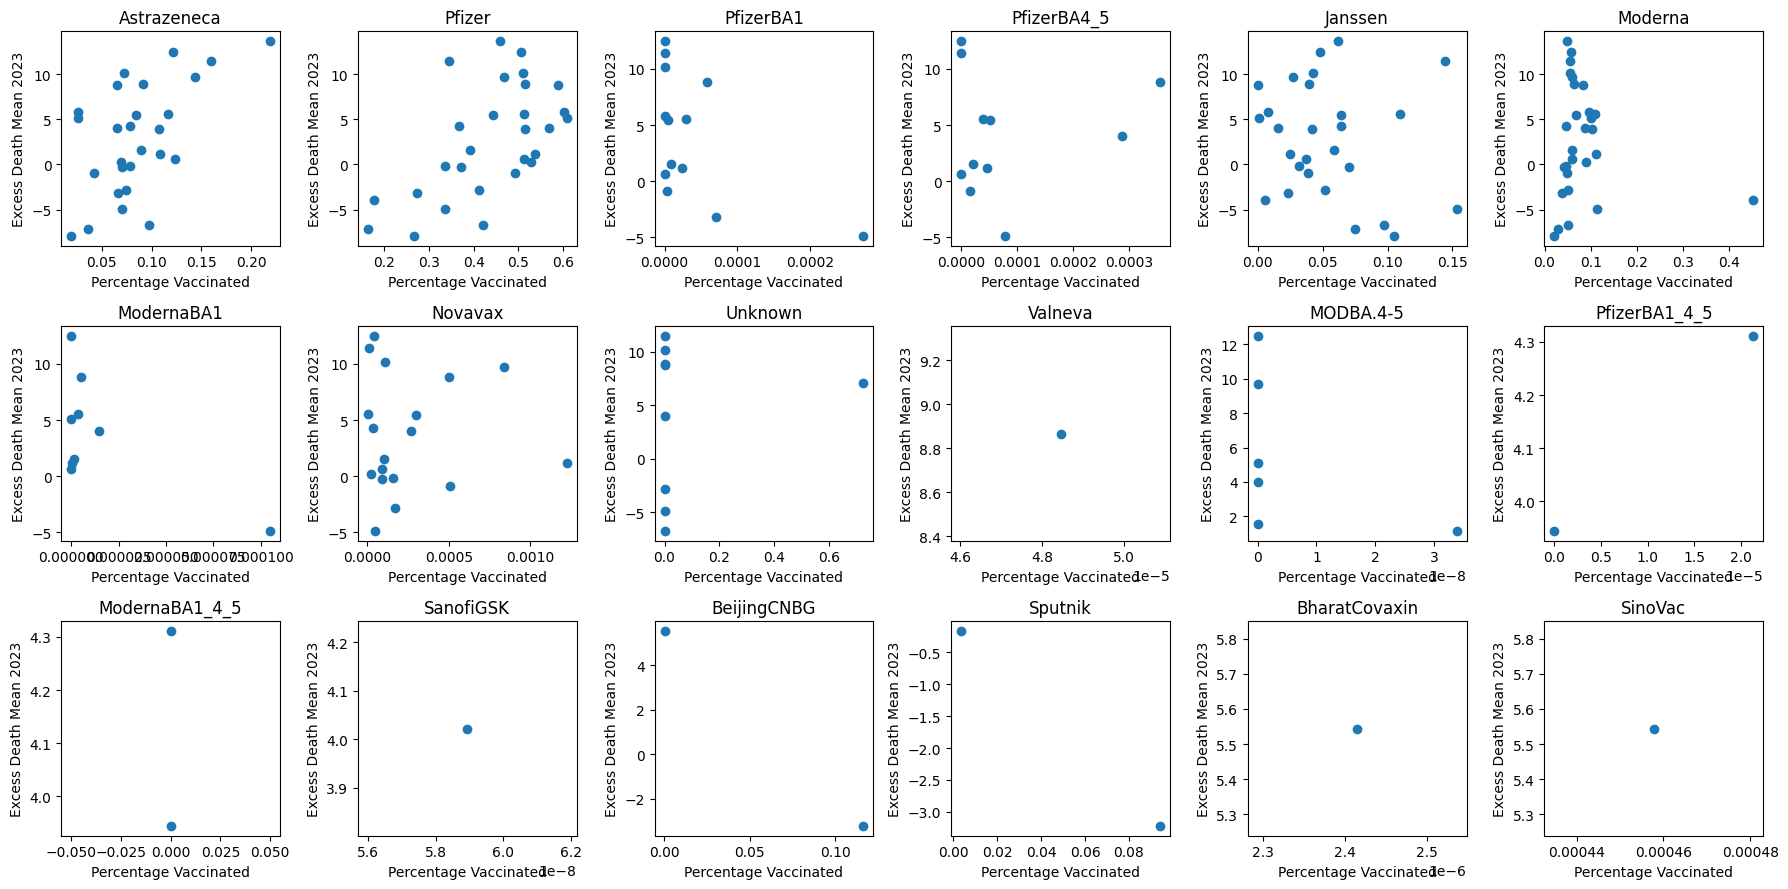

In [35]:
#
import plot1

#
plot1.plot_vax(vaccine_dict, '% vaxed', 'Mean 2023')

The only vaccine types with suffcient data to merit further inspection are the 4 most uptaken vaccines (Pfizer, Moderna, Astrazenica and Janssen) as you can see from the scale of the x axes on all of the plots.  

In [36]:

AZ_linregress = table_regress_type.loc['Astrazeneca']
MOD_linregress = table_regress_type.loc['Moderna']
PF_linregress = table_regress_type.loc['Pfizer']
JAN_linregress = table_regress_type.loc['Janssen']

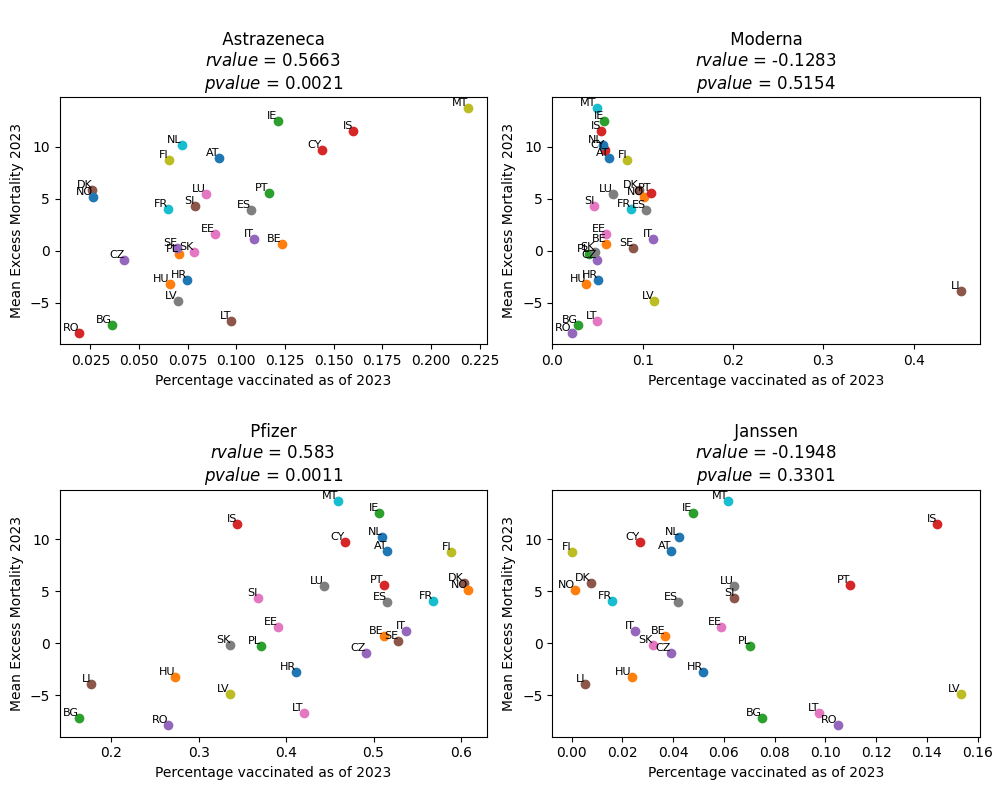

In [37]:

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for x, y, country in zip(vaccine_dict['Astrazeneca']['% vaxed'],
                         vaccine_dict['Astrazeneca']['Mean 2023'],
                         vaccine_dict['Astrazeneca']['ReportingCountry']):
    axs[0, 0].scatter(x, y)
    axs[0, 0].text(x, y, country, fontsize=8, ha='right', va='bottom')
    axs[0, 0].set_title(f"\n Astrazeneca \n$rvalue$ = {round(AZ_linregress['r-value'],4)} \n$pvalue$ = {round(AZ_linregress['p-value'],4)}")


for x, y, country in zip(vaccine_dict['Moderna']['% vaxed'],
                         vaccine_dict['Moderna']['Mean 2023'],
                         vaccine_dict['Moderna']['ReportingCountry']):
    axs[0, 1].scatter(x, y)
    axs[0, 1].text(x, y, country, fontsize=8, ha='right', va='bottom')  
    axs[0, 1].set_title(f"\n Moderna \n$rvalue$ = {round(MOD_linregress['r-value'],4)} \n$pvalue$ = {round(MOD_linregress['p-value'],4)}")


for x, y, country in zip(vaccine_dict['Pfizer']['% vaxed'],
                         vaccine_dict['Pfizer']['Mean 2023'],
                         vaccine_dict['Pfizer']['ReportingCountry']):
    axs[1, 0].scatter(x, y)
    axs[1, 0].text(x, y, country, fontsize=8, ha='right', va='bottom')  # Adjust fontsize and position as needed
    axs[1, 0].set_title(f"\n Pfizer \n$rvalue$ = {round(PF_linregress['r-value'],4)} \n$pvalue$ = {round(PF_linregress['p-value'],4)}")


for x, y, country in zip(vaccine_dict['Janssen']['% vaxed'],
                         vaccine_dict['Janssen']['Mean 2023'],
                         vaccine_dict['Janssen']['ReportingCountry']):
    axs[1, 1].scatter(x, y)
    axs[1, 1].text(x, y, country, fontsize=8, ha='right', va='bottom')  # Adjust fontsize and position as needed
    axs[1, 1].set_title(f"\n Janssen \n$rvalue$ = {round(JAN_linregress['r-value'],4)} \n$pvalue$ = {round(JAN_linregress['p-value'],4)}")

for ax in axs.flat:

    ax.set(xlabel='Percentage vaccinated as of 2023', ylabel='Mean Excess Mortality 2023')


plt.tight_layout()


plt.show()

The proportion of the population vaccinated with both Astrazeneca and Pfizer vaccines at the end of 2022, appears to have medium positive correlation with excess mortality in 2023. They have r values of 0.5663 and 0.583 respectively. The low p values of these plots show that they are statistically surprising and are worth looking into in more detail.  

The Janssen plot has a p-value of 0.33 and therefore we cannot make any conclusions as to the nature of the relationship between Janssen vaccination uptake and excess mortality in 2023. 

The moderna plot inlcudes an outlier in Lichenstein. We decided to remove this anomalous result.   

Text(0.5, 1.0, '\n Moderna plot without Lichenstein\n$rvalue$ = 0.2145 \n$pvalue$ = 0.2826')

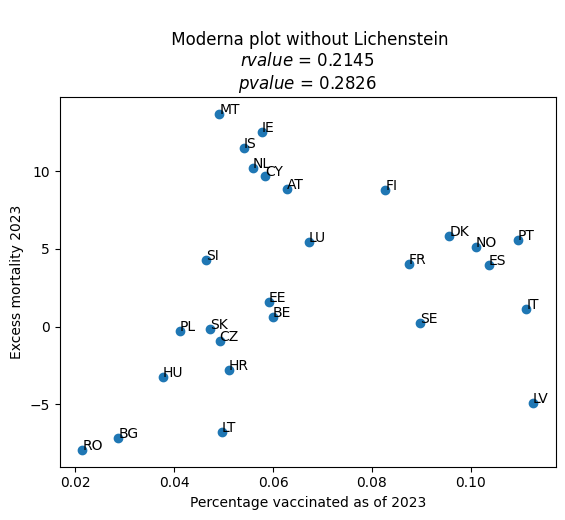

In [38]:
no_LI = vaccine_dict['Moderna'][vaccine_dict['Moderna']['ReportingCountry'] != 'LI']
no_LI_regression = sps.linregress(no_LI['% vaxed'], no_LI['Mean 2023'])

no_LI = vaccine_dict['Moderna'][vaccine_dict['Moderna']['ReportingCountry'] != 'LI']
plt.scatter(no_LI['% vaxed'], no_LI['Mean 2023'])
for i in range(len(no_LI)):
    plt.text(no_LI['% vaxed'].iloc[i], no_LI['Mean 2023'].iloc[i], no_LI['ReportingCountry'].iloc[i])
plt.xlabel('Percentage vaccinated as of 2023')
plt.ylabel('Excess mortality 2023')
plt.title(f"\n Moderna plot without Lichenstein\n$rvalue$ = {round(no_LI_regression.rvalue,4)} \n$pvalue$ = {round(no_LI_regression.pvalue,4)}")


Even after removing this outlier the p-value still remains at 0.2826. Again no conclusion can be made as to the nature of the moderna vaccine and excess mortality in 2023.

### Permutation test

The p-value and r-values from the linregress function assume linearity and independence of the given variables. Unfortunately, due to the highly interconnected value of mortality which can be affected by a variety of factors and the fact that the vaccination rate itself is affected by mortality it is un-wise to take those values at face value.

Instead we chose to use the permutation test. A method that shuffles one column of variables between two different types of vaccines and then takes the slope for each new null word vaccine substracts them and compare the given difference to the real world slope difference. It does this thousands of times and tells you have far the real world data is from a null world hypothesis. Ie: in worlds where the relationship between vaccine rates and mortality rates is random how many times would you find the real world value.

In our case between Astrazeneca and Pfizer their data is so unlikely that among a million trials their difference never shows up. This means that the model we’be made is extremely significant.

In [39]:
PFI = sps.linregress(vaccine_dict['Pfizer']['% vaxed'], vaccine_dict['Pfizer']['Mean 2023'])
ASTRA = sps.linregress(vaccine_dict['Astrazeneca']['% vaxed'], vaccine_dict['Astrazeneca']['Mean 2023'])
SDIFF = ASTRA.slope - PFI.slope

Number of times real difference in slopes occurs in permutation:  0


((array([  20.,  172.,  759., 1968., 2890., 2497., 1268.,  361.,   62.,
            3.]),
  array([-30.58616398, -24.12050251, -17.65484104, -11.18917957,
          -4.72351811,   1.74214336,   8.20780483,  14.67346629,
          21.13912776,  27.60478923,  34.0704507 ]),
  <BarContainer object of 10 artists>),
 Text(0.5, 0, 'Difference in permuted slopes'),
 Text(0, 0.5, 'Count'),
 None)

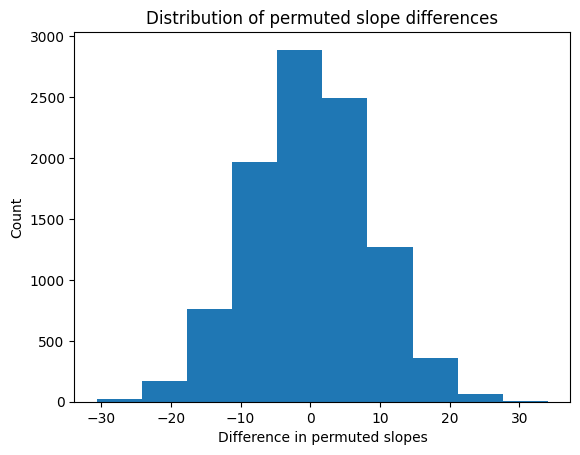

In [49]:
import permutation
permutation.permute('Pfizer', 'Astrazeneca', vaccine_dict)

When running the above code the closer you get to 5000 the less significant the model is. The closer it is to 0 or 10000 the better the level of significance. Among our data the relationship between mortality rates and vaccine rates can be confirmed.

### Further interrogation of the results

__Major limitations__ - look into potential known known confounders

Age, flu, health service strain



__Explore Commonalities__ between similar groupings of countries. Which countries bought certain vaccines - are there any commonalities. 

- Which countries had most of each vaccine 
- Did countries which got pfizer also get astrazenica? 
- What was the spatial trend in vaccine type uptake?

In [41]:
# Calculate the unvaccinated proportion
by_type_and_country['Unvaccinated'] = 1 - by_type_and_country.groupby('ReportingCountry')['% vaxed'].transform('sum')

# Prepare pie chart data
pie_chart_data = by_type_and_country.pivot_table(index='ReportingCountry', columns='VaccineType', values='% vaxed', fill_value=0)
pie_chart_data['Unvaccinated'] = by_type_and_country.groupby('ReportingCountry')['Unvaccinated'].first()

# Create an array to order countries by their observed mean excess mortality 2023
order_array = excess_mortality.sort_values('Mean 2023')['ReportingCountry'].values

# Filter array for only values in pie_chart_data
filtered_array = order_array[pd.Series(order_array).isin(pie_chart_data.index)].tolist()

# Order pie chart data by excess mortality observed 2023 low > high
ordered_pie_chart_data = pie_chart_data.reindex(filtered_array)


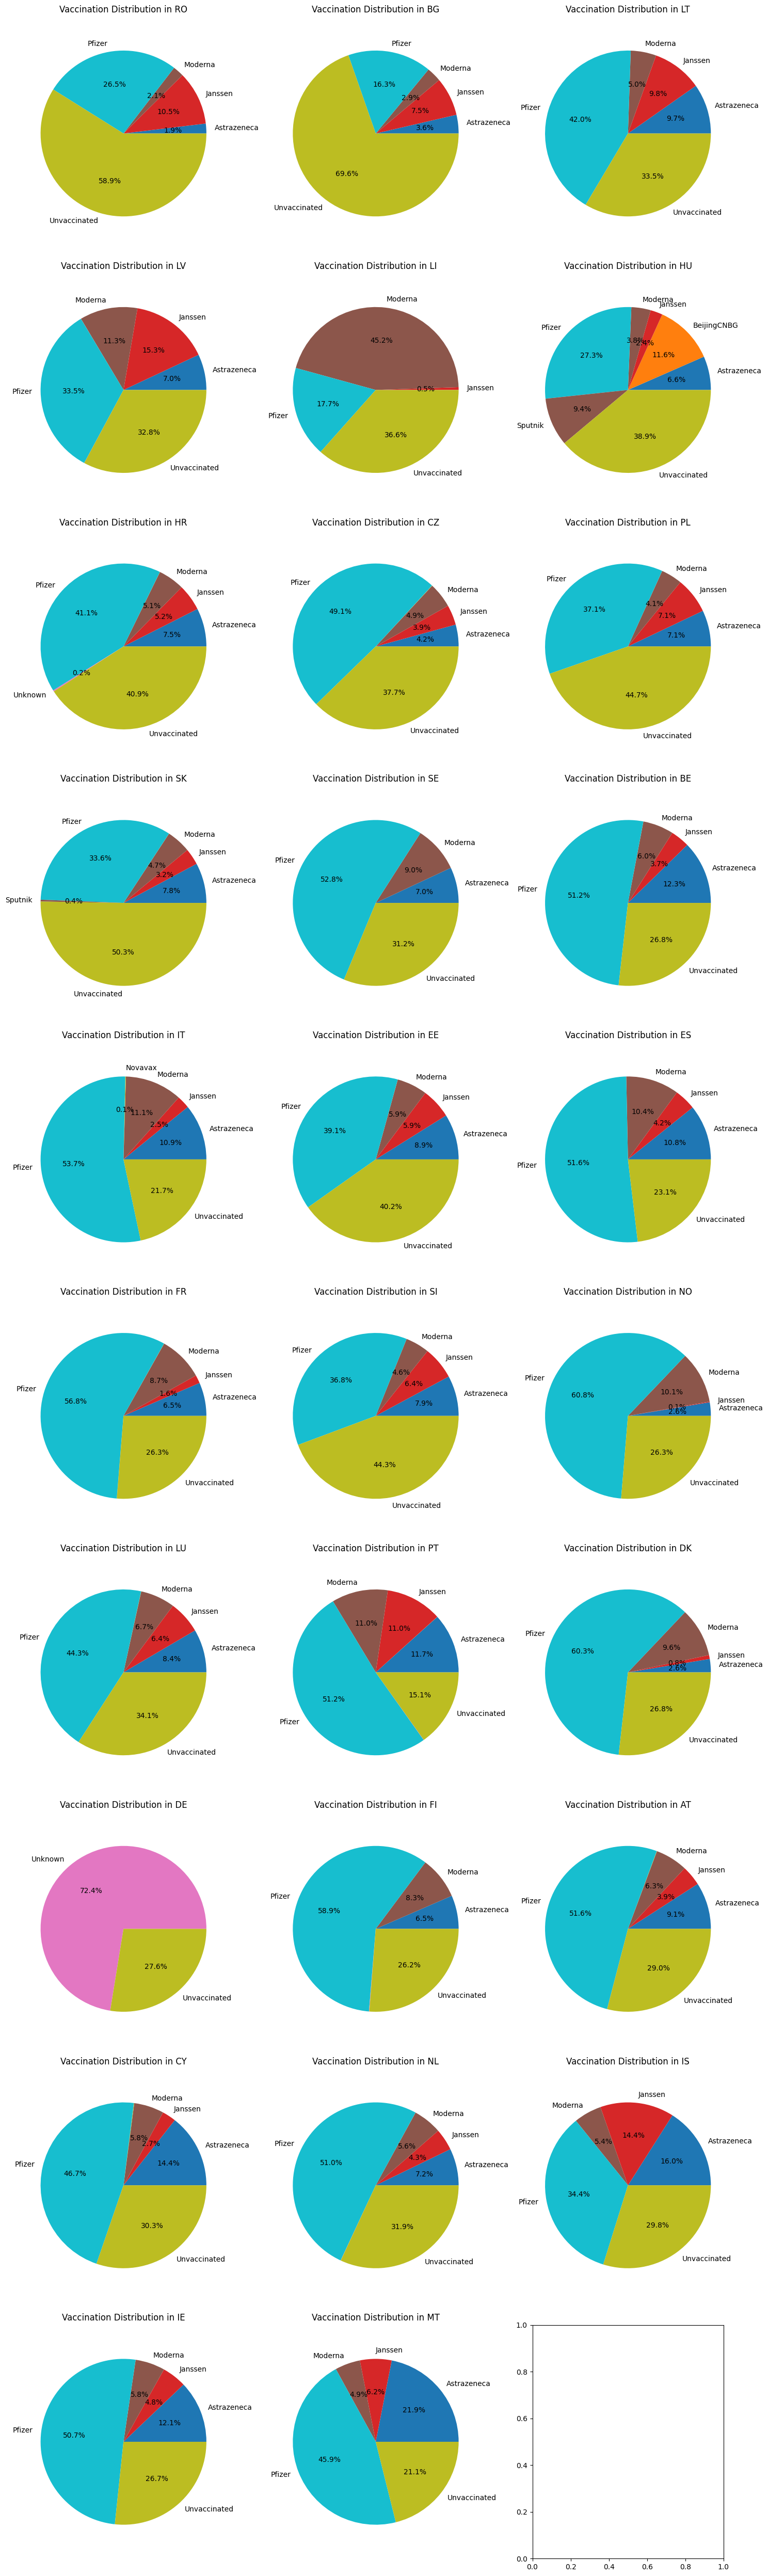

In [42]:

# Function to prevent overcrowding of percentage labels 
def custom_autopct(pct):
   return '{:.1f}%'.format(pct) if pct > 0.1 else ''

# Create subplots
fig, axes = plt.subplots(10, 3, figsize=(15, 50))  
# Flatten the axes array to allow for iteration
axes = axes.flatten()  

# Plot each pie chart
for i, country in enumerate(ordered_pie_chart_data.index):
    country_data = ordered_pie_chart_data.loc[country]
    # Creating custom labels
    labels = [label if value > 0.001 else '' for label, value in country_data.items()]
    axes[i].pie(country_data, labels=labels, autopct=lambda pct: custom_autopct(pct))
    axes[i].set_title(f'Vaccination Distribution in {country}')
    axes[i].axis('equal')


# Adjust layout
plt.tight_layout()
plt.show()

In [43]:
mortality_by_age = pd.read_csv('data/excess-mortality-p-scores-projected-baseline-by-age.csv')
mortality_by_age

,Entity,Code,Day,p_proj_0_14,p_proj_15_64,p_proj_65_74,p_proj_75_84,p_proj_85p,p_proj_all_ages
0,Albania,ALB,2020-01-31,NaN,NaN,NaN,NaN,NaN,-10.16
1,Albania,ALB,2020-02-29,NaN,NaN,NaN,NaN,NaN,2.88
2,Albania,ALB,2020-03-31,NaN,NaN,NaN,NaN,NaN,1.31
3,Albania,ALB,2020-04-30,NaN,NaN,NaN,NaN,NaN,4.04
4,Albania,ALB,2020-05-31,NaN,NaN,NaN,NaN,NaN,7.00
...,...,...,...,...,...,...,...,...,...
13398,Uzbekistan,UZB,2023-05-31,NaN,NaN,NaN,NaN,NaN,-0.04
13399,Uzbekistan,UZB,2023-06-30,NaN,NaN,NaN,NaN,NaN,17.24
13400,Uzbekistan,UZB,2023-07-31,NaN,NaN,NaN,NaN,NaN,24.89
13401,Uzbekistan,UZB,2023-08-31,NaN,NaN,NaN,NaN,NaN,50.87


In [44]:
just_eu = mortality_by_age[mortality_by_age['Entity'].isin(country_code_dict)]
just_eu

,Entity,Code,Day,p_proj_0_14,p_proj_15_64,p_proj_65_74,p_proj_75_84,p_proj_85p,p_proj_all_ages
390,Austria,AUT,2020-01-05,-66.67,-4.39,-19.88,-8.24,-13.76,-12.10
391,Austria,AUT,2020-01-12,17.65,-2.09,-1.07,-8.38,-15.91,-9.87
392,Austria,AUT,2020-01-19,106.90,-7.20,3.90,5.84,-5.46,-0.81
393,Austria,AUT,2020-01-26,62.50,14.76,-1.01,6.26,-7.38,0.39
394,Austria,AUT,2020-02-02,-11.76,-4.92,4.39,15.74,2.97,5.62
...,...,...,...,...,...,...,...,...,...
12634,Switzerland,CHE,2023-11-05,-71.01,-8.16,-5.82,14.76,13.34,8.03
12635,Switzerland,CHE,2023-11-12,-50.82,-8.05,3.23,15.89,18.71,12.47
12636,Switzerland,CHE,2023-11-19,-12.28,-10.14,-8.71,34.21,17.12,14.50
12637,Switzerland,CHE,2023-11-26,-60.00,-4.35,1.80,26.59,8.80,10.69


In [45]:
just_eu['Year'] = just_eu['Day'].str[6:]
just_eu

,Entity,Code,Day,p_proj_0_14,p_proj_15_64,p_proj_65_74,p_proj_75_84,p_proj_85p,p_proj_all_ages,Year
390,Austria,AUT,2020-01-05,-66.67,-4.39,-19.88,-8.24,-13.76,-12.10,1-05
391,Austria,AUT,2020-01-12,17.65,-2.09,-1.07,-8.38,-15.91,-9.87,1-12
392,Austria,AUT,2020-01-19,106.90,-7.20,3.90,5.84,-5.46,-0.81,1-19
393,Austria,AUT,2020-01-26,62.50,14.76,-1.01,6.26,-7.38,0.39,1-26
394,Austria,AUT,2020-02-02,-11.76,-4.92,4.39,15.74,2.97,5.62,2-02
...,...,...,...,...,...,...,...,...,...,...
12634,Switzerland,CHE,2023-11-05,-71.01,-8.16,-5.82,14.76,13.34,8.03,1-05
12635,Switzerland,CHE,2023-11-12,-50.82,-8.05,3.23,15.89,18.71,12.47,1-12
12636,Switzerland,CHE,2023-11-19,-12.28,-10.14,-8.71,34.21,17.12,14.50,1-19
12637,Switzerland,CHE,2023-11-26,-60.00,-4.35,1.80,26.59,8.80,10.69,1-26


In [46]:
just_eu_2023 = just_eu[just_eu['Year'] == '2023']
just_eu_2023

,Entity,Code,Day,p_proj_0_14,p_proj_15_64,p_proj_65_74,p_proj_75_84,p_proj_85p,p_proj_all_ages,Year


In [47]:
mean_2023_mortality = just_eu_2023.groupby('Entity').agg({'p_proj_0_14':'mean', 'p_proj_15_64': 'mean', 'p_proj_65_74':'mean', 'p_proj_75_84':'mean', 'p_proj_85p':'mean','p_proj_all_ages':'mean'})
pd.DataFrame(mean_2023_mortality.sort_values(by = 'p_proj_all_ages', ascending = False))

,p_proj_0_14,p_proj_15_64,p_proj_65_74,p_proj_75_84,p_proj_85p,p_proj_all_ages
Entity,,,,,,


### Conclusion

- Areas for future research 




